In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../data/customer_items.csv', parse_dates=[4],low_memory=False)


In [3]:
df.dtypes

establishment_name                 object
pos_station                        object
order_number                        int64
order_type                         object
order_date                 datetime64[ns]
customer_id                       float64
first_name                         object
last_name                          object
company_name                       object
email                              object
reference_id                      float64
order_sub_total                   float64
order_sales_tax                   float64
order_total                       float64
payment_amount                    float64
payment_type                       object
product_name                       object
barcode                           float64
sku                               float64
cost                              float64
product_price                     float64
category                           object
sub_category                       object
class                             

In [4]:
df = df[df['exchange_void_or_return']==0]
df['date']= df['order_date'].dt.date

In [5]:
df.head(5)

,establishment_name,pos_station,order_number,order_type,order_date,customer_id,first_name,last_name,company_name,email,...,exchange_void_or_return,return_exchange_reason,discount_amount,discount_reason,gross_item_price,total_sales_price,total_product_tax,product_quantity,special_request,date
1,New Batavia,POS1,15210,Eat In,2018-09-21 09:06:56,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1.60,1.60,0.15,1,NaN,2018-09-21
2,New Batavia,POS1,15210,Eat In,2018-09-21 09:06:56,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1.80,1.80,0.18,1,NaN,2018-09-21
7,New Batavia,POS1,15226,Eat In,2018-09-21 09:44:00,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1.85,1.85,0.17,1,NaN,2018-09-21
8,New Batavia,POS1,15226,Eat In,2018-09-21 09:44:00,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1.60,1.60,0.15,1,NaN,2018-09-21
9,New Batavia,POS1,15227,Eat In,2018-09-21 09:44:52,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0.00,0.00,0.00,1,NaN,2018-09-21


In [6]:
#daily = df.groupby(['date','product_name']).count()['product_quantity'].reset_index()
daily = df.groupby(['date']).count()['product_quantity'].reset_index()

In [7]:
daily = df.groupby(['date']).sum()['order_total'].reset_index()

In [8]:
daily.head(5)

,date,order_total
0,2018-09-21,1559.37
1,2018-09-22,6938.60
2,2018-09-24,2251.30
3,2018-09-25,2375.68
4,2018-09-26,3171.32


In [10]:
#dsY = daily[daily['product_name']=='Agua de Hibisco']
dsY = daily
renamed = dsY.rename(index=str,columns={'date':'ds', 'order_total': 'y'})
renamed

,ds,y
0,2018-09-21,1559.37
1,2018-09-22,6938.60
2,2018-09-24,2251.30
3,2018-09-25,2375.68
4,2018-09-26,3171.32
5,2018-09-27,3334.58
6,2018-09-28,1792.22
7,2018-09-29,1260.49
8,2018-10-01,1583.13
9,2018-10-02,817.30


In [19]:
m = Prophet(yearly_seasonality=False)
m.fit(renamed)

/usr/local/dsc/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/dsc/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
176,2019-04-18
177,2019-04-19
178,2019-04-20
179,2019-04-21
180,2019-04-22


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-21,2421.633816,748.769545,3852.668066
1,2018-09-22,2268.591820,787.192616,3723.420886
2,2018-09-24,2261.741483,769.919783,3778.269123
3,2018-09-25,2022.173409,532.195220,3533.380114
4,2018-09-26,2678.496039,1259.031570,4086.876098
5,2018-09-27,2478.859435,958.874343,3991.706290
6,2018-09-28,2453.066564,840.207932,3854.686360
7,2018-09-29,2300.024568,958.457646,3951.189091
8,2018-10-01,2293.174230,769.876509,3791.093651
9,2018-10-02,2053.606157,547.469471,3592.322733


In [132]:
renamed.head(15)

,ds,y
0,2018-09-21,1559.37
1,2018-09-22,6938.60
2,2018-09-24,2251.30
3,2018-09-25,2375.68
4,2018-09-26,3199.92
5,2018-09-27,3347.83
6,2018-09-28,1792.22
7,2018-09-29,1260.49
8,2018-10-01,1583.13
9,2018-10-02,826.15


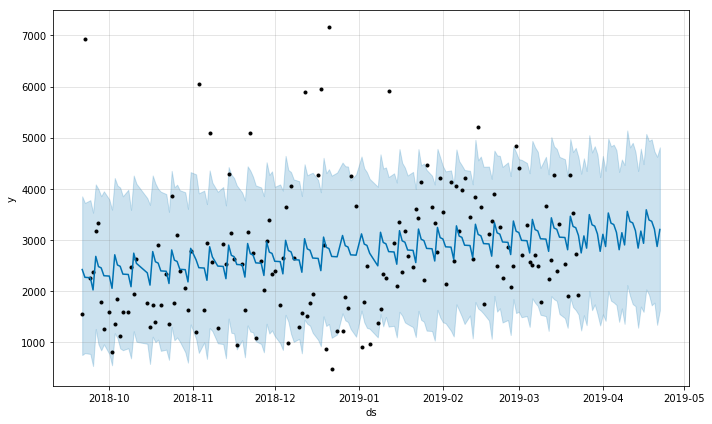

In [22]:
fig1 = m.plot(forecast)

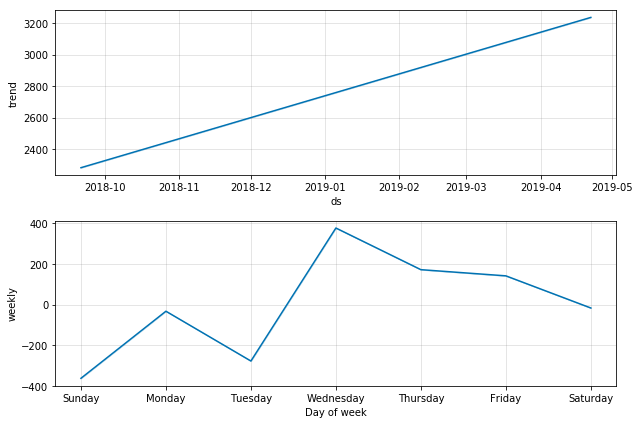

In [23]:
fig2 = m.plot_components(forecast)

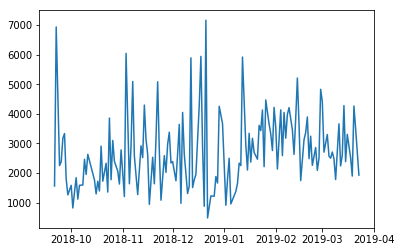

In [24]:
plt.plot(renamed['ds'], renamed['y'])

,date,order_total
0,2018-09-21,1559.37
1,2018-09-22,6938.60
2,2018-09-24,2251.30
3,2018-09-25,2375.68
4,2018-09-26,3199.92
5,2018-09-27,3347.83
6,2018-09-28,1792.22
7,2018-09-29,1260.49
8,2018-10-01,1583.13
9,2018-10-02,826.15
